In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from tabulate import tabulate


In [61]:
train=pd.read_csv(r"C:\Users\nehas\Downloads\archive\Train_data.csv")


In [62]:
test=pd.read_csv(r"C:\Users\nehas\Downloads\archive\Test_data.csv")

In [63]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [66]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [67]:
train.describe(include='object')


,protocol_type,service,flag,class
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


In [68]:
train.shape

(25192, 42)

In [69]:
train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [70]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [71]:
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


<Axes: xlabel='class', ylabel='count'>

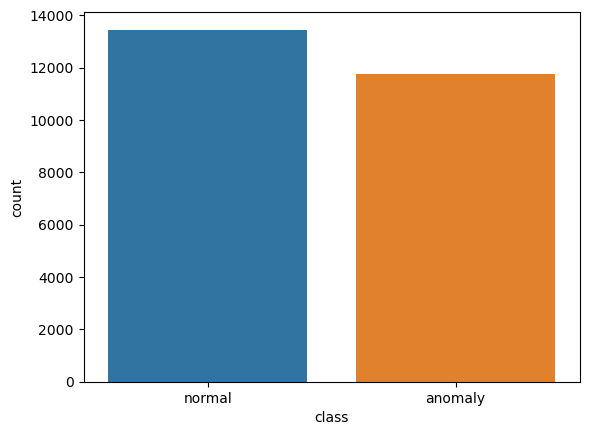

In [72]:
sns.countplot(x=train['class'])

In [73]:
print('Class distribution Training set:')
print(train['class'].value_counts())

Class distribution Training set:
class
normal     13449
anomaly    11743
Name: count, dtype: int64


In [74]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
le(test)

In [75]:
train.drop(['num_outbound_cmds'], axis=1, inplace=True)
test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [76]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [77]:

test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,1,45,1,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,1,45,1,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,1,19,9,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,0,13,9,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,1,55,2,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [78]:
X_train = train.drop(['class'], axis=1)
Y_train = train['class']

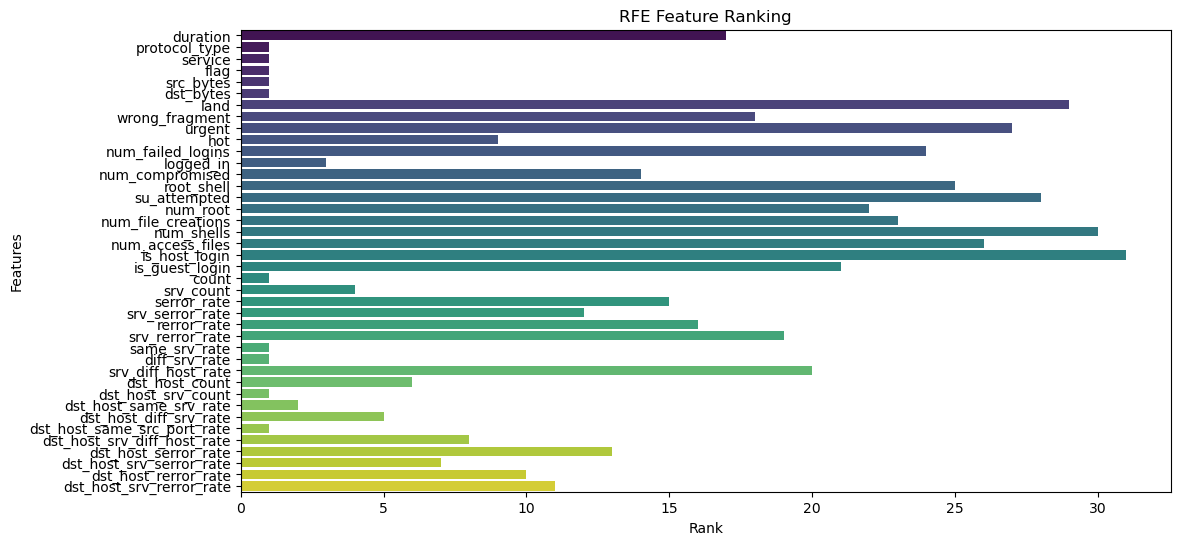

['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate']

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train and Y_train are your training features and target
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

# Get selected features and their rankings
feature_ranks = pd.Series(rfe.ranking_, index=X_train.columns)
selected_features = feature_ranks.nsmallest(10).index.tolist()

# Filter X_train to include only selected features
X_train_selected = X_train[selected_features]

# Plot the feature ranks
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_ranks.values, y=feature_ranks.index, palette='viridis')
plt.xlabel('Rank')
plt.ylabel('Features')
plt.title('RFE Feature Ranking')
plt.show()

# Show the selected features
selected_features


In [80]:
X_train = X_train[selected_features]

In [81]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test = scale.fit_transform(test)

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [83]:
x_train.shape

(17634, 10)

In [84]:
x_test.shape

(7558, 10)

In [85]:
y_train.shape

(17634,)

In [86]:
y_test.shape

(7558,)

In [87]:
import time

In [88]:
from sklearn.linear_model import LogisticRegression
  
clfl = LogisticRegression(max_iter = 1200000)
start_time = time.time()
clfl.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)
 

Training time:  0.3237037658691406


In [89]:
start_time = time.time()
y_test_pred = clfl.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.027005910873413086


In [90]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [91]:
lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")

Training Score: 0.942270613587388
Test Score: 0.9391373379200847


In [92]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [93]:
def objective(trial):
    n_neighbors = trial.suggest_int('KNN_n_neighbors', 2, 16, log=False)
    classifier_obj = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [94]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=1)
print(study_KNN.best_trial)

FrozenTrial(number=0, state=1, values=[0.9829319925906325], datetime_start=datetime.datetime(2024, 4, 29, 13, 2, 54, 666206), datetime_complete=datetime.datetime(2024, 4, 29, 13, 2, 55, 941084), params={'KNN_n_neighbors': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'KNN_n_neighbors': IntDistribution(high=16, log=False, low=2, step=1)}, trial_id=0, value=None)


In [95]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['KNN_n_neighbors'])
KNN_model.fit(x_train, y_train)

KNN_train, KNN_test = KNN_model.score(x_train, y_train), KNN_model.score(x_test, y_test)

print(f"Train Score: {KNN_train}")
print(f"Test Score: {KNN_test}")

Train Score: 0.9889985255755926
Test Score: 0.9829319925906325


In [96]:
from sklearn.tree import DecisionTreeClassifier
  
clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
clfd.fit(x_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

Training time:  0.06824707984924316


In [97]:
start_time = time.time()
y_test_pred = clfd.predict(x_train)
end_time = time.time()
print("Testing time: ", end_time-start_time)

Testing time:  0.007996559143066406


In [98]:
def objective(trial):
    dt_max_depth = trial.suggest_int('dt_max_depth', 2, 32, log=False)
    dt_max_features = trial.suggest_int('dt_max_features', 2, 10, log=False)
    classifier_obj = DecisionTreeClassifier(max_features = dt_max_features, max_depth = dt_max_depth)
    classifier_obj.fit(x_train, y_train)
    accuracy = classifier_obj.score(x_test, y_test)
    return accuracy

In [99]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=11, state=1, values=[0.9952368351415718], datetime_start=datetime.datetime(2024, 4, 29, 13, 3, 4, 416291), datetime_complete=datetime.datetime(2024, 4, 29, 13, 3, 4, 532602), params={'dt_max_depth': 21, 'dt_max_features': 8}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'dt_max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'dt_max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=11, value=None)


In [100]:
dt = DecisionTreeClassifier(max_features = study_dt.best_trial.params['dt_max_features'], max_depth = study_dt.best_trial.params['dt_max_depth'])
dt.fit(x_train, y_train)

dt_train, dt_test = dt.score(x_train, y_train), dt.score(x_test, y_test)

print(f"Train Score: {dt_train}")
print(f"Test Score: {dt_test}")




Train Score: 1.0
Test Score: 0.9932521831172267


In [101]:
from tabulate import tabulate
data = [["KNN", KNN_train, KNN_test], 
        ["Logistic Regression", lg_train, lg_test],
        ["Decision Tree", dt_train, dt_test]]

col_names = ["Model", "Train Score", "Test Score"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒═════════════════════╤═══════════════╤══════════════╕
│ Model               │   Train Score │   Test Score │
╞═════════════════════╪═══════════════╪══════════════╡
│ KNN                 │      0.988999 │     0.982932 │
├─────────────────────┼───────────────┼──────────────┤
│ Logistic Regression │      0.942271 │     0.939137 │
├─────────────────────┼───────────────┼──────────────┤
│ Decision Tree       │      1        │     0.993252 │
╘═════════════════════╧═══════════════╧══════════════╛


In [102]:
SEED = 42

# Decision Tree Model
dtc = DecisionTreeClassifier()

# KNN
knn = KNeighborsClassifier()

# LOGISTIC REGRESSION MODEL

lr = LogisticRegression()

In [103]:
from sklearn.model_selection import cross_val_score
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [104]:
scores = {}
for name in models:
  scores[name]={}
  for scorer in ['precision','recall']:
    scores[name][scorer] = cross_val_score(models[name], x_train, y_train, cv=10, scoring=scorer)

In [105]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision','recall']:
    mean = round(np.mean(scores[name][scorer])*100,2)
    stdev = round(np.std(scores[name][scorer])*100,2)
    print ("Mean {}:".format(scorer),"\n", mean,"%", "+-",stdev)
    print()

*************** KNeighborsClassifier Model Validation ***************
Mean precision: 
 98.5 % +- 0.42

Mean recall: 
 98.35 % +- 0.43

**************** LogisticRegression Model Validation ****************
Mean precision: 
 93.55 % +- 0.58

Mean recall: 
 95.62 % +- 0.6

************** DecisionTreeClassifier Model Validation **************
Mean precision: 
 99.45 % +- 0.2

Mean recall: 
 99.42 % +- 0.22



<Axes: >

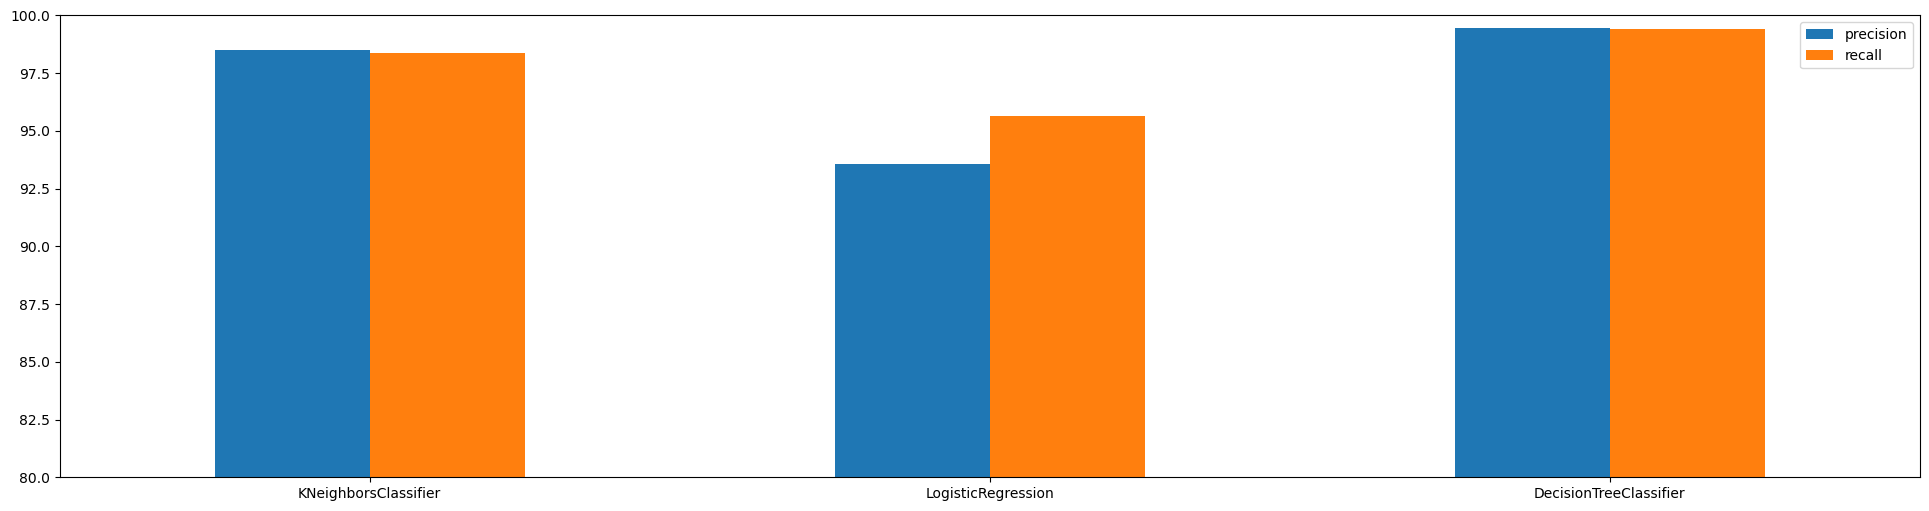

In [106]:
for name in models:
    for scorer in ['precision','recall']:
        scores[name][scorer] = scores[name][scorer].mean()
scores=pd.DataFrame(scores).swapaxes("index", "columns")*100
scores.plot(kind = "bar",  ylim=[80,100], figsize=(24,6), rot=0)

In [107]:
models = {}
models['KNeighborsClassifier']= knn
models['LogisticRegression']= lr
models['DecisionTreeClassifier']= dtc

In [108]:
preds={}
for name in models:
    models[name].fit(x_train, y_train)
    preds[name] = models[name].predict(x_test)
print("Predictions complete.")

Predictions complete.


In [109]:
for name, predictions in preds.items():
    print(f"Model '{name}' predictions:")
    print(predictions)
    print()


Model 'KNeighborsClassifier' predictions:
[0 0 0 ... 0 1 1]

Model 'LogisticRegression' predictions:
[0 1 0 ... 0 1 1]

Model 'DecisionTreeClassifier' predictions:
[0 0 0 ... 1 1 1]



In [110]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
def line(name,sym="*"):
    return sym*(25-len(name)//2)
target_names=["normal","anamoly"]
for name in models:
    print(line(name), name, 'Model Testing', line(name))
    print(confusion_matrix(y_test, preds[name]))
    print(line(name,'-'))
    print(classification_report(y_test, preds[name], target_names=target_names))

*************** KNeighborsClassifier Model Testing ***************
[[3438   60]
 [  65 3995]]
---------------
              precision    recall  f1-score   support

      normal       0.98      0.98      0.98      3498
     anamoly       0.99      0.98      0.98      4060

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

**************** LogisticRegression Model Testing ****************
[[3220  278]
 [ 182 3878]]
----------------
              precision    recall  f1-score   support

      normal       0.95      0.92      0.93      3498
     anamoly       0.93      0.96      0.94      4060

    accuracy                           0.94      7558
   macro avg       0.94      0.94      0.94      7558
weighted avg       0.94      0.94      0.94      7558

************** DecisionTreeClassifier Model Testing **************
[[3478   20]
 [  27 4033]]
--------------
              pr

<Axes: >

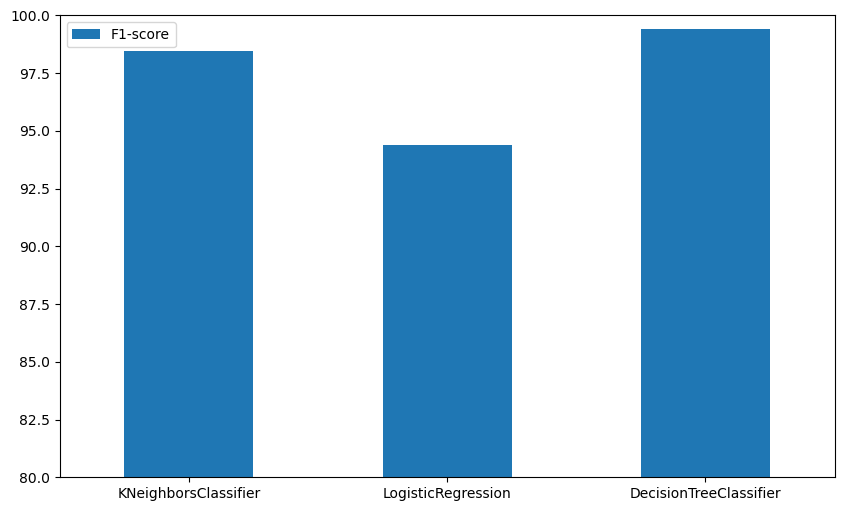

In [111]:
f1s = {}
for name in models:
    f1s[name]=f1_score(y_test, preds[name])
f1s=pd.DataFrame(f1s.values(),index=f1s.keys(),columns=["F1-score"])*100
f1s.plot(kind = "bar",  ylim=[80,100], figsize=(10,6), rot=0)

In [112]:
import pandas as pd
from tabulate import tabulate

 
print(tabulate(f1s, headers='keys', tablefmt='pretty'))

+------------------------+-------------------+
|                        |     F1-score      |
+------------------------+-------------------+
|  KNeighborsClassifier  | 98.4596426370918  |
|   LogisticRegression   | 94.40116845180137 |
| DecisionTreeClassifier | 99.42068285467768 |
+------------------------+-------------------+


In [113]:
import pickle

In [114]:
pickle.dump(lr,open('network.pkl','wb'))

In [115]:
pickle_model=pickle.load(open('network.pkl','rb'))

In [116]:
import pandas as pd
import numpy as np

# Assuming 'test' is your data
test_data = pd.DataFrame(test)  # Convert test to a DataFrame

print(test_data.head())  # Use test_data instead of test
print(test_data[:5])      # Use test_data instead of test
print(test_data.shape)    # Use test_data instead of test

# Assuming 'scale' and 'pickle_model' are already defined
data_row = test_data.iloc[0].values.reshape(1, -1)
scaled_data = scale.transform(data_row)
prediction = pickle_model.predict(scaled_data)
  # Removed extra parentheses here





         0         1         2         3         4         5         6   \
0 -0.155534 -0.176303  0.933964 -1.829954 -0.021988 -0.096896 -0.017624   
1 -0.155534 -0.176303  0.933964 -1.829954 -0.021988 -0.096896 -0.017624   
2 -0.154113 -0.176303 -0.882254  0.662256  0.005473 -0.096896 -0.017624   
3 -0.155534 -2.695050 -1.301382  0.662256 -0.021946 -0.096896 -0.017624   
4 -0.154823 -0.176303  1.632509 -1.518428 -0.021988 -0.096189 -0.017624   

         7         8         9   ...        30        31        32        33  \
0 -0.059104 -0.019459 -0.113521  ...  0.650093 -1.169697 -1.305370 -0.138370   
1 -0.059104 -0.019459 -0.113521  ...  0.650093 -1.250212 -1.397181 -0.138370   
2 -0.059104 -0.019459 -0.113521  ... -0.636681 -0.489800  0.002934 -0.228985   
3 -0.059104 -0.019459 -0.113521  ... -2.029801 -0.749234  0.898090 -0.410217   
4 -0.059104 -0.019459 -0.113521  ... -1.753304 -0.489800 -0.685647  0.360018   

         34        35        36       37        38        39  
0 -0.

c:\Users\nehas\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 40 features, but LogisticRegression is expecting 10 features as input.

In [ ]:
# coreect implimentation:
import pandas as pd

# Load train and test datasets
train=pd.read_csv(r"C:\Users\nehas\Downloads\archive\Train_data.csv")
test=pd.read_csv(r"C:\Users\nehas\Downloads\archive\Test_data.csv")

# Preprocessing (if necessary)
# For example, handle missing values, encode categorical variables, scale numerical features, etc.

# Ensure both datasets have the same features
required_features = ['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 
                     'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 
                     'dst_host_same_srv_rate']

train = train[required_features]
test= test[required_features]

# Apply the recommend_security_measures function to train data
train_recommended_measures = recommend_security_measures(train)
print("Recommended Security Measures for Train Data:")
for measure in train_recommended_measures:
    print("-", measure)

# Apply the recommend_security_measures function to test data
test_recommended_measures = recommend_security_measures(test)
print("\nRecommended Security Measures for Test Data:")
for measure in test_recommended_measures:
    print("-", measure)


Recommended Security Measures for Train Data:

Recommended Security Measures for Test Data:
